# PES FIT

In [1]:
import numpy as np
import pandas as pd
from scipy.special import legendre
import matplotlib.pyplot as plt

In [2]:
from tqdm.notebook import tqdm
from time import sleep


In [3]:
nc=94    # number of R points
nphi = 7     # number of angles

In [4]:
df_out1 = pd.read_csv('2_inp_2D_PES_bak.dat',header=None,sep='\s+',names=['R','th','E']) 
df_out1['E'] = (df_out1['E'] + 0.5)
#df_out1['E'] = (df_out1['E'] - 0.02853169958234048)

In [5]:
df_out1

,R,th,E
0,2.7,0,129510.866024
1,2.8,0,123701.201378
2,2.9,0,122804.322692
3,3.0,0,70657.067204
4,3.1,0,50361.383438
...,...,...,...
653,11.6,90,0.519753
654,11.7,90,0.521947
655,11.8,90,0.524142
656,11.9,90,0.526337


In [6]:
R = np.arange(2.7,12.1,0.1)
#R2 = np.arange(9.0,21.0,1.0)
#R = np.concatenate((R1,R2),axis=None)
df_out = pd.DataFrame(R, columns=['R'])
len(R)

94

In [7]:
from scipy.optimize import curve_fit
lm=nphi
a,b,c,d,e,f,rmsx = np.zeros(lm),np.zeros(lm),np.zeros(lm),np.zeros(lm),np.zeros(lm),np.zeros(lm),np.zeros(lm)
def exp_fit3(x, a,b,c,d):
    return  a*np.exp(-5*x) + b*np.exp(-c*x)+ d*np.power(x,-12) #+c*np.exp(-3*x)+ d*np.exp(-3.5*x) # +e*np.exp(-5*x)+f*np.exp(-6*x)
def exp_fit(x, a,b,c):
    return  a*np.exp(-1.2*x)+b*np.exp(-3.3*x)+c*np.exp(-3.8*x) #+ d*np.power(x,-24) #+ d*np.exp(-3.8*x) # +e*np.exp(-5*x)+f*np.exp(-6*x)
def exp_fit2(x, a,b,c):
    return  a*np.exp(-1.2*x)+b*np.exp(-3.3*x)+c*np.exp(-3.8*x) #+ d*np.exp(-3.8*x) # +e*np.exp(-5*x)+f*np.exp(-6*x)

In [8]:
x_dummy=R
x_3 = np.arange(2.,20.1,0.1)

  0%|          | 0/7 [00:00<?, ?it/s]

[-1.41552471e+04 -1.22795490e+09  1.84327442e+10]


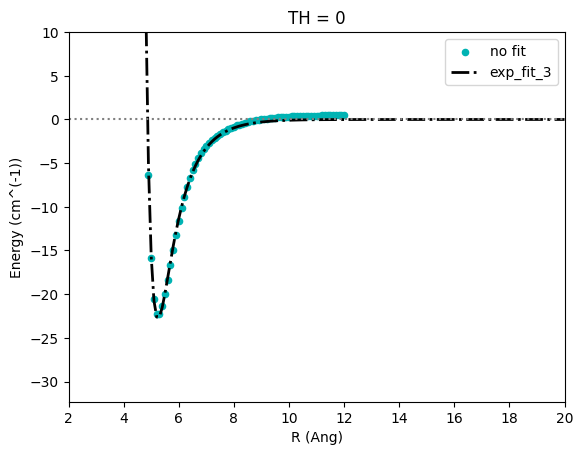

[-1.24895435e+04 -7.65803125e+08  1.11151488e+10]


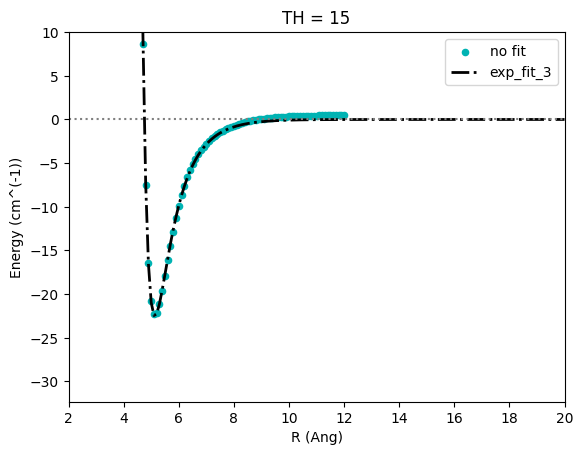

[-9.26793143e+03 -2.35098719e+08  3.08848104e+09]


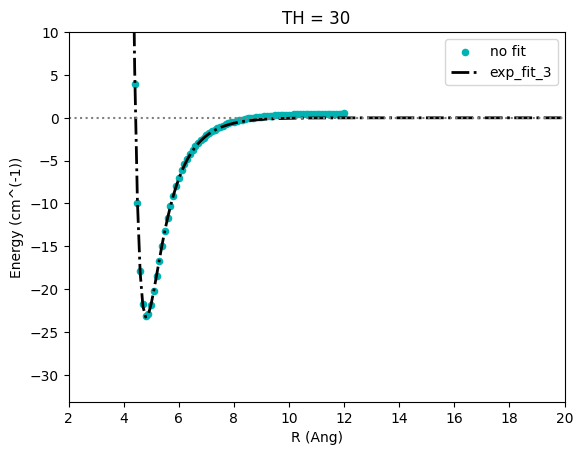

[-6.19598226e+03 -4.27935821e+07  4.95494613e+08]


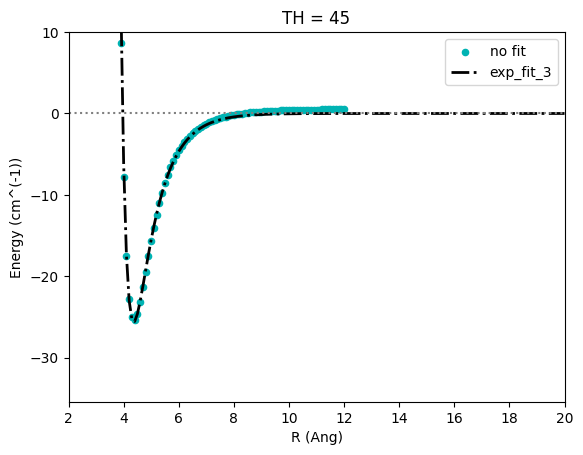

[-4.02840267e+03 -9.15671804e+06  8.53789574e+07]


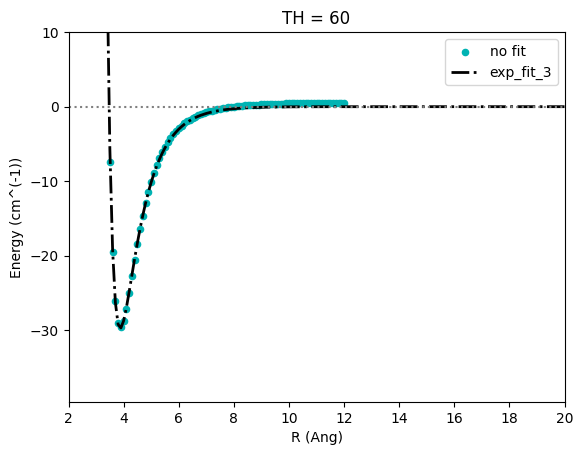

[-2.98085003e+03 -3.87733616e+06  2.57676479e+07]


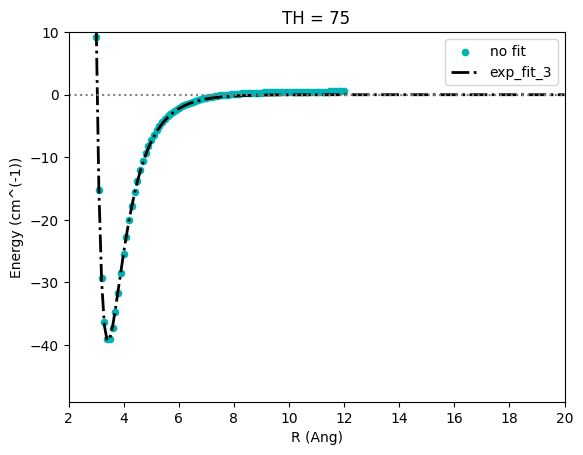

[-2.68814924e+03 -3.26501427e+06  1.78657341e+07]


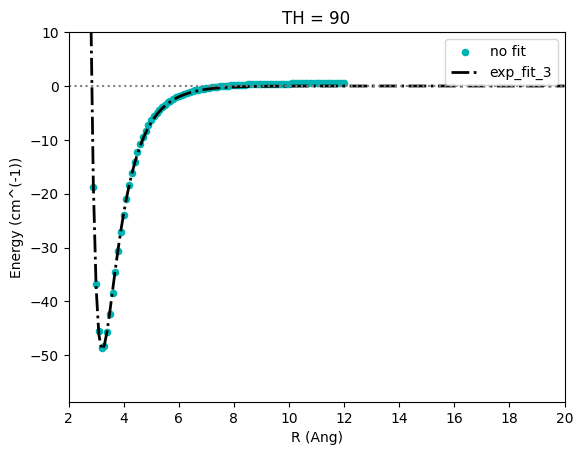

In [9]:
predicted_energies = []
for i in tqdm(range (lm)):   
    start, end = nc*i, nc*(i+1)
    df_inp = df_out1.iloc[start:end,:].reset_index(drop=True)
    df_inp.columns=['a','b',i]
    y_dummy = df_inp[i]
    j = i
    xx=np.argmin(y_dummy, axis=None)-3
    parsx, covx = curve_fit(f=exp_fit, xdata=x_dummy[xx:], ydata=y_dummy[xx:], p0=[0,0,1000])
    a[j],b[j],c[j]= parsx   
    print(parsx)
    # plot original curve
    plt.scatter(x_dummy, y_dummy,s=20, color='#00b3b3',label = 'no fit')
    
    # plot fitted curves
    plt.plot(x_3,  exp_fit(x_3, *parsx), linestyle='-.', linewidth=2, color='black', label = 'exp_fit_3')    
    plt.legend(loc="upper right")
    plt.ylabel("Energy (cm^(-1))")
    plt.xlabel("R (Ang)")
    plt.axhline(y=0, color='grey', linestyle=':')
    plt.title("TH = %d" %(i*15))
    plt.ylim(max(y_dummy.min()-10,-200), 10)
    plt.xlim(2.0, 20)
    plt.show()
    E = exp_fit(x_3, a[j],b[j],c[j])
    predicted_energies = np.append(predicted_energies,E)

In [10]:
len(predicted_energies)

1267

In [11]:
A = np.ndarray(shape=(1,2)) # junk array initialization
r1 = np.arange(2.0,20.1,0.1) 
r_n = len(r1) # saving number of R data points
r4 = np.atleast_2d(r1).T   # creating r column vector
for i_phi in tqdm(range (0,91,15)):
            b = np.array([i_phi])
            c = np.tile(b,(r_n,1))  # creating angles as columns
            d = np.c_[ r4, c ]        # joining r and columns
            A = np.vstack([A, d]) # repeating for different geoms and joining
A = np.delete(A, 0, 0) # deleting first row (empty)

  0%|          | 0/7 [00:00<?, ?it/s]

In [12]:
final_data = np.c_[ A, predicted_energies ]
np.savetxt("2D_chk_out.dat", final_data, delimiter=",",fmt='%.2f,%d,%.4f')